# 신뢰구간

## 01. 신뢰구간 개요

- 표본에서 얻은 정보를 기반으로 모집단의 특성을 추정하는 방법 중 하나

- 신뢰구간은 일반적으로 표본 크기, 추정 방법, 데이터 변동성 등과 같은 요소에 따라 달라질 수 있음

- 정확한 신뢰구간을 구하기 위해서는 통계학적인 가정과 계산 방법을 사용해야 함

In [1]:
import warnings 
warnings.filterwarnings(action='ignore')

import sys 
import seaborn as sns 
from math import sqrt
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy.stats import t

In [2]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 9 
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = pd.read_excel("../rawdata/height.xlsx")
origin

,학년,성별,키
0,1,남자,163
1,2,여자,154
2,1,남자,171
3,3,여자,160
4,4,남자,169
5,4,남자,175
6,2,남자,179
7,1,여자,166
8,1,남자,169
9,1,남자,164


## 2. 신뢰구간 구하기 

### 2-1. 신뢰구간을 구하는 데 필요한 값 산출

#### 2-1-1. 신뢰수준과 대상 데이터

In [4]:
clevel = 0.95
data = origin['키']

#### 2-1-2. 샘플 사이즈

In [5]:
n = len(data)
n

36

#### 2-1-3. 자유도 (degree of freedom)

- 총 관측치 - 1

In [7]:
dof = n - 1
dof

35

#### 2-1-4. 표본 평균

In [8]:
sample_mean = data.mean()
sample_mean

167.83333333333334

##### 2-1-5. 표본 표준편차

- 파이썬에서는 표준편차를 계산할 때 옵션으로 ddof를 사용

- ddof=1은 표준편차를 계산할 때, n-1로 나누라는 의미

In [9]:
sample_std = data.std(ddof=1)
sample_std

7.315345905306579

#### 2-1-6. 표본 표준오차

- 표준편차 / sqrt(샘플크기)

In [10]:
sample_std_error = sample_std / sqrt(n)
sample_std_error

1.2192243175510964

### 2-2. 신뢰구간

- scipy.stats 패키지의 t객체가 포함하는 interval(신뢰도, 자유도, loc=샘플평균, scale=샘플표준오차) 사용

In [12]:
cmin, cmax = t.interval(clevel, dof, loc=sample_mean, scale=sample_std_error)
cmin, cmax

(165.35817637995726, 170.30849028670943)

### 2-3 신뢰구간 범위 시각화

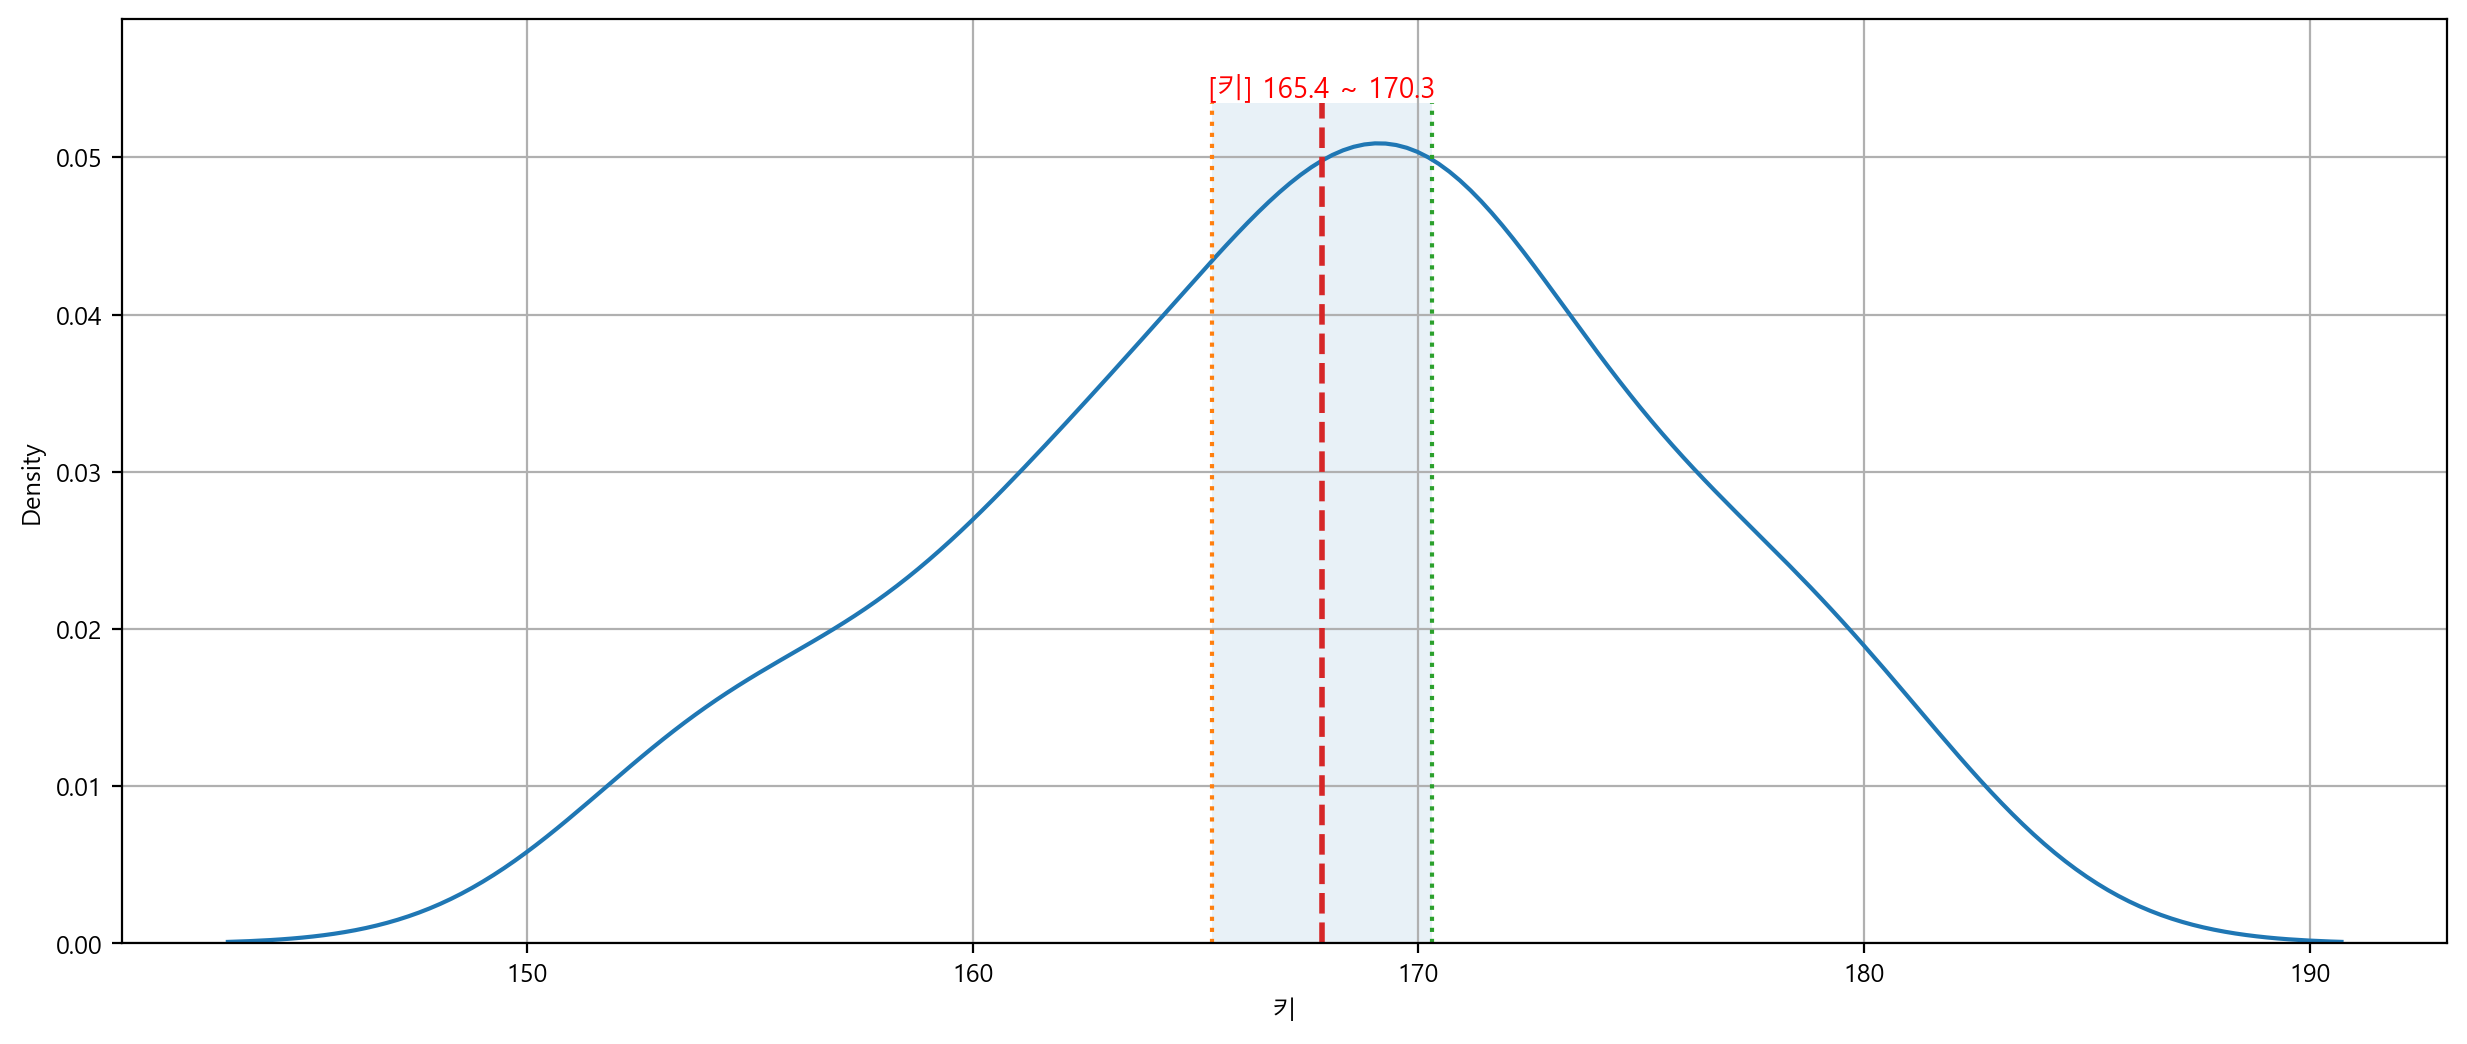

In [19]:
plt.figure()

sns.kdeplot(data=data)

xmin, xmax, ymin, ymax = plt.axis()

# 신뢰구간 그리기
plt.plot([cmin, cmin], [0, ymax], linestyle=":")
plt.plot([cmax, cmax], [0, ymax], linestyle=":")
plt.fill_between([cmin, cmax], y1=0, y2=ymax, alpha=0.1)

# 평균 그리기
plt.plot([sample_mean, sample_mean], [0, ymax], linestyle="--", linewidth=2)

plt.text(x=(cmax-cmin) / 2 + cmin,
         y=ymax,
         s="[%s] %0.1f ~ %0.1f" % (data.name, cmin, cmax),
         horizontalalignment="center",
         verticalalignment="bottom",
         fontdict={"size": 10, "color" : "red"})

plt.ylim(ymin, ymax*1.1)
plt.grid()
plt.show()